In [1]:
from plot import DataVisualizer

In [2]:
dv = DataVisualizer("ResNet/combined_depth_sweeps")

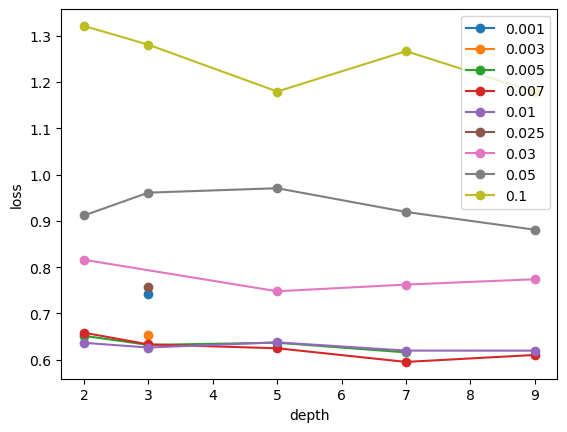

In [3]:
dv.visualize_data("depth", "lr")